In [12]:
using Plots
using DelimitedFiles
using LaTeXStrings

# include a file up one directory 
include("../stabilityFunctions.jl")

Hg (generic function with 1 method)

This is a quick notebook that saves the frames from the figures that show the wave profiles and the bifurcation branch from the solutions computed using MATLAB. The solutions were computed in summer 2022 (or perhaps even earlier) for the travelling waves on a ferrofluid jet problem.

#### Defining equations

In [41]:
struct Constants
	N::Int64  					# number of modes for solution S(z)
	L::Number                   # half-domain length
	
	# domain definition
	dz::Float64 				# domain spacing
    z::Vector{Float64} 			# domain vector of values (2N + 2 ponts)

	# magnetic constants 
	B::Float64 					# Bond number 
	b::Float64 					# inner rod radius
    E::Float64                  # Bernoulli constant 
	
	
	function Constants(N::Int64, L::Number, B::Float64, b::Float64)
        dz = 2*L / (2*N+1)
        z = collect(-L:dz:L)
		z = collect(range(-L, stop=L, length=1000))
		
        E = 1 - B/2

        new(N, L, dz, z, B, b, E)
    end
end

In [64]:
function plotting(solutions, index::Int, constants::Constants, shift_profiles = true)

	ii = index 

	# un-pack constants 
	z = constants.z
	N = constants.N
	L = constants.L

	branchN = length(solutions[:,1])

	# seperate coeffs and speeds
	coeffs = solutions[:,2:end]
	speeds = solutions[:,1];

	# create array for profiles
	profiles = zeros(branchN,length(z))
	
	# convert profiles
	for i = 1:branchN
		profiles[i,:] .= fourierSeries(coeffs[i,:], z, L)[1]
	end

	# shift to the right profiles over by L
	if shift_profiles == true
		profiles = [profiles[:,Int(end/2)+1:end] profiles[:,1:Int(end/2)]]; nothing
	end

	# plot profiles 
	profile_plot = plot(z, profiles[ii,:], legend=false, title = "a1 = $(round(coeffs[ii,2], digits=3))", lw=2)
	xlabel!(L"z"); ylabel!(L"S")

	# plot coeffs 
	first_coeff = 0
	coeff_plot = scatter(abs.(coeffs[ii,first_coeff+1:end]), legend=false, title="k = $(round(ii*π/L))", xticks = :all, yaxis=:log)
	xlabel!("a$(first_coeff) to a$(length(coeffs[1,:])-1)")

	# plot branch
	branch_plot = scatter(speeds[1:ii], coeffs[1:ii,2], legend = false, markersize=4)
	xlabel!(L"c"); ylabel!(L"a_1")

	return profile_plot, branch_plot, coeff_plot
	
end

plotting (generic function with 2 methods)

### Travelling Waves (no ripples)

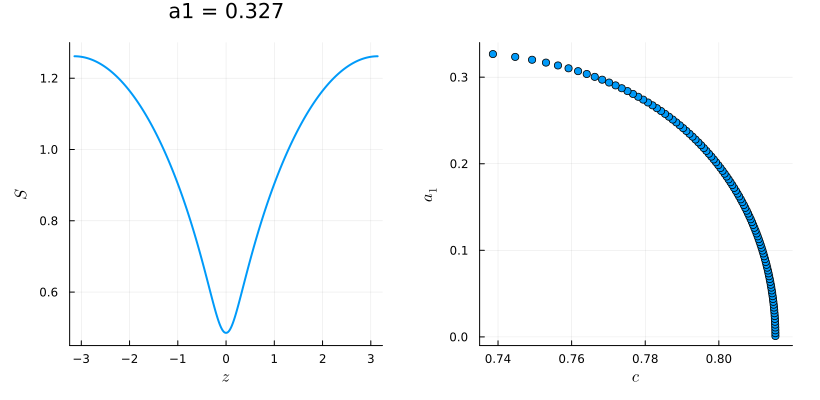

In [98]:
# set constants
constants = Constants(36,π,1.5,0.1)

# load data
solutions = readdlm("matlab_solutions.csv", ',', Float64) 

# plot profiles 
profile_plot, branch_plot = plotting(solutions, 100, constants)
plot(profile_plot, branch_plot, layout=(1,2), size=(820,400))

# change axis limits for only the profile plot but keep subplots 
plot!(xlims=(-π-0.1,π+0.1), ylims=(0.45,1.3), subplot=1)
plot!(xlims=(0.735,0.82), ylims=(-0.01,0.34), subplot=2)

# add spacing around plots
plot!(margin=5Plots.mm) 

In [99]:
# save figures for each a1 value
for i = 1:100
    profile_plot, branch_plot = plotting(solutions, i, constants)
    plot(profile_plot, branch_plot, layout=(1,2), size=(820,400))
    plot!(dpi=300)

    plot!(xlims=(-π-0.1,π+0.1), ylims=(0.45,1.3), subplot=1)
    plot!(xlims=(0.735,0.82), ylims=(-0.01,0.34), subplot=2)

    # add spacing around plots
    plot!(margin=5Plots.mm)
    
    savefig("solutions/$(i).pdf")
end

### Wilton Ripples

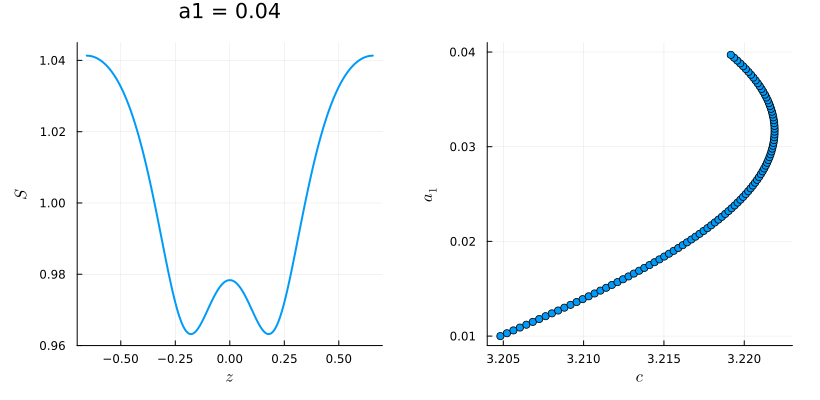

In [134]:
# set constants
wilton_constants = Constants(36,2.061/π,30.0,0.1)

# load data
wilton_solutions = readdlm("wilton_solutions.csv", ',', Float64)

# plot profiles
profile_plot, branch_plot = plotting(wilton_solutions, 100, wilton_constants)
plot(profile_plot, branch_plot, layout=(1,2), size=(820,400))

# change axis limits for only the profile plot but keep subplots
plot!(xlims=(-0.7,0.7), ylims=(0.96,1.045), subplot=1)
plot!(xlims=(3.204,3.223), ylims=(0.009,0.041), subplot=2)

# add spacing around plots
plot!(margin=5Plots.mm)

In [135]:
# save figures for each a1 value
for i = 1:100
    profile_plot, branch_plot = plotting(wilton_solutions, i, wilton_constants)
    plot(profile_plot, branch_plot, layout=(1,2), size=(820,400))
    plot!(dpi=300)

    plot!(xlims=(-0.7,0.7), ylims=(0.96,1.045), subplot=1)
    plot!(xlims=(3.204,3.223), ylims=(0.009,0.041), subplot=2)

    # add spacing around plots
    plot!(margin=5Plots.mm)
    
    savefig("wilton_solutions/$(i).pdf")
end

### More Wilton Ripples